# **Import necessary libraries**

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load your dataset

In [2]:
df = pd.read_csv('drug_dataset.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Data Preprocessing
# Handle missing data (if any)

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Encode categorical attributes using label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


# Split the data into features (X) and target (y)

In [12]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [13]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [14]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32


# Split the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [17]:
X_train.shape

(160, 5)

In [18]:
y_train

79     3
197    3
38     3
24     4
122    4
      ..
106    3
14     3
92     4
179    4
102    2
Name: Drug, Length: 160, dtype: int32

# Create an Adaboost Classifier

In [19]:
# Create an AdaBoost classifier with decision trees as base estimators
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
n_estimators = 50  # The number of weak learners (you can adjust this)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the classifier to the training data

In [21]:
# Train the AdaBoost classifier
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)


# Make predictions on the test data



In [22]:
# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

In [23]:
y_pred

array([3, 4, 3, 3, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 0, 4, 0, 3, 3, 4, 0, 3,
       3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 0, 4, 3, 0, 4, 0])


# Evaluate the model

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


# Generate a classification report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.69      1.00      0.81        11
           4       1.00      1.00      1.00        15

    accuracy                           0.80        40
   macro avg       0.47      0.60      0.52        40
weighted avg       0.66      0.80      0.72        40



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


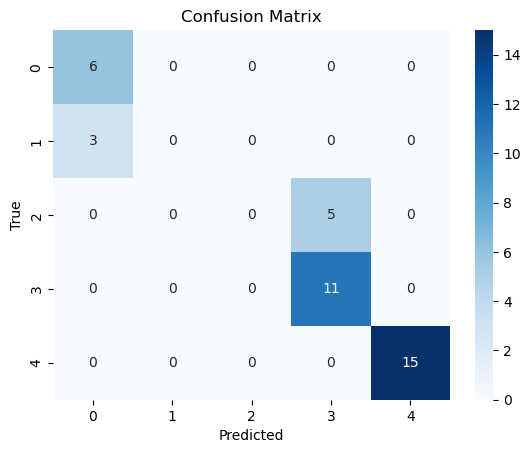

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)

class_labels = ['Negative', 'Positive']

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()